# AI vs Human Content Analysis
This notebook analyzes a dataset containing text generated by humans, AI, and post-edited AI.
We explore differences in content type, domain, language, word count, and prompts.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Loading Dataset

In [3]:
df = pd.read_csv("ai_human_detection.csv" , encoding="ISO-8859-1")

In [4]:
df

,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
0,e37e31c0-35d0-486d-9760-efadd4e0e289,Aprender programaciÃ³n en Python es fÃ¡cil . P...,human,Human,NaN,Technical Blog,es,none,34,2026-01-29T08:38:18.272755,v1.0
1,68e294cf-a499-4fbf-8616-2d6324570be9,Error: 400 Client Error: Bad Request for url: ...,ai,gemma2-9b-it,Discute el papel de la tecnologÃ­a en el apren...,Education,es,none,9,2026-01-29T08:58:20.717225,v1.0
2,b5e06ef0-9758-471f-81dc-182c6117ee81,Error: 404 Client Error: Not Found for url: ht...,ai,gemma2-9b-itllama-3.3-70b-versatile,Create a cold outreach email for business part...,Email,en,none,9,2026-01-29T09:13:20.114765,v1.0
3,6177fc40-1567-445b-af15-f3250ddd3403,**Global Economic Trends: A Shifting Landscape...,ai,llama-3.1-8b-instant,Write about economic trends affecting global m...,News,en,none,558,2026-01-29T08:39:55.917663,v1.0
4,192a9615-ed51-4750-b649-d18f8882f555,"""Recuerda que tÃº eres fuerte, capaz y Ãºnica....",ai,llama-3.1-8b-instant,Escribe una publicaciÃ³n inspiradora para rede...,Social Media,es,none,147,2026-01-29T08:42:52.451370,v1.0
...,...,...,...,...,...,...,...,...,...,...,...
681,5c456fba-3620-4fbc-bafe-5c80118ae373,"[Your Name]\n[Your Address]\n[City, State, ZIP...",ai,llama-3.1-8b-instant,Draft a professional resignation letter,Email,en,none,246,2026-01-29T08:50:45.470360,v1.0
682,f4884bf9-2d9f-4644-a923-9bf97d069d83,Photosynthesis is a vital process that helps p...,ai,llama-3.1-8b-instant,Explain the concept of photosynthesis in simpl...,Education,en,none,276,2026-01-29T08:44:54.445312,v1.0
683,f5b65cbb-45f1-4baf-9b40-9d8cd5d557e8,Ø§ÙØ§Ø¨ØªÙØ§Ø±Ø§Øª Ø§ÙØ¹ÙÙ ÙØ© ÙÙ ÙØªØ...,ai,llama-3.1-8b-instant,ØªÙØ±ÙØ± Ø¹Ù Ø§ÙØ§Ø¨ØªÙØ§Ø±Ø§Øª Ø§ÙØ¹ÙÙ...,News,ar,none,373,2026-01-29T08:39:09.891410,v1.0
684,abae20ec-140e-4782-9b76-1bc8cead6dc8,Le gouvernement a annoncÃ© de nouvelles mesure...,human,Human,NaN,News,fr,none,53,2026-01-29T08:38:18.283728,v1.0


Dataset has 686 rows and 11 columns.

**Key columns:** text, human_or_ai, source_model, prompt, domain, language, word_count.

##Dataset Overview

In [5]:
df.isna().sum()

,0
id,0
text,0
human_or_ai,0
source_model,0
prompt,181
domain,0
language,0
edit_level,0
word_count,0
generation_date,0


In [6]:
df["prompt"].unique()

array([nan, 'Discute el papel de la tecnologÃ\xada en el aprendizaje',
       'Create a cold outreach email for business partnership',
       'Write about economic trends affecting global markets',
       'Escribe una publicaciÃ³n inspiradora para redes sociales',
       'à¤µà¥\x8dà¤¯à¤¾à¤µà¤¸à¤¾à¤¯à¤¿à¤\x95 à¤¸à¤¹à¤¯à¥\x8bà¤\x97 à¤\x95à¥\x87 à¤²à¤¿à¤\x8f à¤\x88à¤®à¥\x87à¤²',
       'Ø³Ù\x88Ø´Ù\x84 Ù\x85Û\x8cÚ\x88Û\x8cØ§ Ù¾Ù\x88Ø³Ù¹ Ù\x84Ú©Ú¾Û\x8cÚº Ù\x85Ù\x88Ù¹Û\x8cÙ\x88Û\x8cØ´Ù\x86 Ú©Û\x92 Ø¨Ø§Ø±Û\x92 Ù\x85Û\x8cÚº',
       'Ù\x88ØµÙ\x81 Ø§Ù\x84Ù\x85Ù\x86ØªØ¬ Ø§Ù\x84Ø¥Ø¨Ø¯Ø§Ø¹Ù\x8a',
       'Fundamentos del aprendizaje automÃ¡tico',
       'Ù\x86Ù\x88Ú©Ø±Û\x8c Ú©Û\x8c Ø¯Ø±Ø®Ù\x88Ø§Ø³Øª Ú©Û\x92 Ù\x84Û\x8cÛ\x92 Ø§Û\x8c Ù\x85Û\x8cÙ\x84 Ù\x84Ú©Ú¾Û\x8cÚº',
       'Create an Instagram caption about mental health awareness',
       'ØªÙ\x82Ø±Ù\x8aØ± Ø¹Ù\x86 Ø§Ù\x84Ø§Ø¨ØªÙ\x83Ø§Ø±Ø§Øª Ø§Ù\x84Ø¹Ù\x84Ù\x85Ù\x8aØ©',
       'ArtÃ\xadculo profesional de LinkedIn',
       "Write an analysis of Shak

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               686 non-null    object
 1   text             686 non-null    object
 2   human_or_ai      686 non-null    object
 3   source_model     686 non-null    object
 4   prompt           505 non-null    object
 5   domain           686 non-null    object
 6   language         686 non-null    object
 7   edit_level       686 non-null    object
 8   word_count       686 non-null    int64 
 9   generation_date  686 non-null    object
 10  version          686 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.1+ KB


prompt has missing values for human-written texts (humans don’t get prompts).

All other columns are complete.

In [10]:
df.describe(include="object")

,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,generation_date,version
count,686,686,686,686,505,686,686,686,686,686
unique,686,686,3,4,163,6,7,3,686,1
top,9063af15-22f8-411e-b7fc-4b4670e6dbc2,Dear Manager\n\nMain agle week chutti ke liye ...,ai,llama-3.1-8b-instant,Write product description for innovative tech ...,Social Media,en,none,2026-01-29T08:38:18.291334,v1.0
freq,1,1,335,499,15,121,246,516,1,686


In [11]:
df.head()

,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
0,e37e31c0-35d0-486d-9760-efadd4e0e289,Aprender programaciÃ³n en Python es fÃ¡cil . P...,human,Human,NaN,Technical Blog,es,none,34,2026-01-29T08:38:18.272755,v1.0
1,68e294cf-a499-4fbf-8616-2d6324570be9,Error: 400 Client Error: Bad Request for url: ...,ai,gemma2-9b-it,Discute el papel de la tecnologÃ­a en el apren...,Education,es,none,9,2026-01-29T08:58:20.717225,v1.0
2,b5e06ef0-9758-471f-81dc-182c6117ee81,Error: 404 Client Error: Not Found for url: ht...,ai,gemma2-9b-itllama-3.3-70b-versatile,Create a cold outreach email for business part...,Email,en,none,9,2026-01-29T09:13:20.114765,v1.0
3,6177fc40-1567-445b-af15-f3250ddd3403,**Global Economic Trends: A Shifting Landscape...,ai,llama-3.1-8b-instant,Write about economic trends affecting global m...,News,en,none,558,2026-01-29T08:39:55.917663,v1.0
4,192a9615-ed51-4750-b649-d18f8882f555,"""Recuerda que tÃº eres fuerte, capaz y Ãºnica....",ai,llama-3.1-8b-instant,Escribe una publicaciÃ³n inspiradora para rede...,Social Media,es,none,147,2026-01-29T08:42:52.451370,v1.0


##Content Counts (Human vs AI vs Post-edited AI)

In [13]:
df.groupby("human_or_ai")["text"].count()

,text
human_or_ai,
ai,335
human,181
post_edited_ai,170


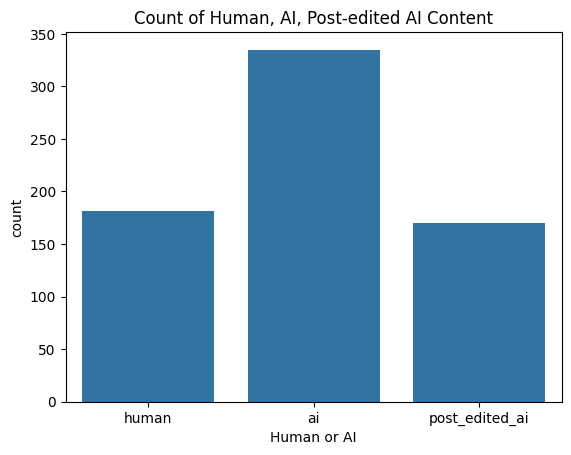

In [44]:
sns.countplot(data=df, x="human_or_ai")
plt.title("Count of Human, AI, Post-edited AI Content")
plt.xlabel("Human or AI")
plt.show()


**Insight:**

You can see the distribution: how many are AI-generated vs human-generated.

In [23]:
df[df["human_or_ai"] == "human"].sum()

,0
id,e37e31c0-35d0-486d-9760-efadd4e0e2896dd66380-1...
text,Aprender programaciÃ³n en Python es fÃ¡cil . P...
human_or_ai,humanhumanhumanhumanhumanhumanhumanhumanhumanh...
source_model,HumanHumanHumanHumanHumanHumanHumanHumanHumanH...
prompt,0
domain,Technical BlogEmailTechnical BlogSocial MediaE...
language,esenhiurfrescode-mixedenenesencode-mixedhienen...
edit_level,nonenonenonenonenonenonenonenonenonenonenoneno...
word_count,7074
generation_date,2026-01-29T08:38:18.2727552026-01-29T08:38:18....


##Checking How many id,s are of human , ai and post_edited_ai

In [24]:
df.groupby("human_or_ai")["id"].count()

,id
human_or_ai,
ai,335
human,181
post_edited_ai,170


##Domain Distribution by content type

In [25]:
df.groupby(["human_or_ai","domain"])["id"].count()

human_or_ai     domain        
ai              Education         46
                Email             59
                Marketing         58
                News              52
                Social Media      60
                Technical Blog    60
human           Education         29
                Email             30
                Marketing         29
                News              27
                Social Media      32
                Technical Blog    34
post_edited_ai  Education         28
                Email             28
                Marketing         34
                News              27
                Social Media      29
                Technical Blog    24
Name: id, dtype: int64

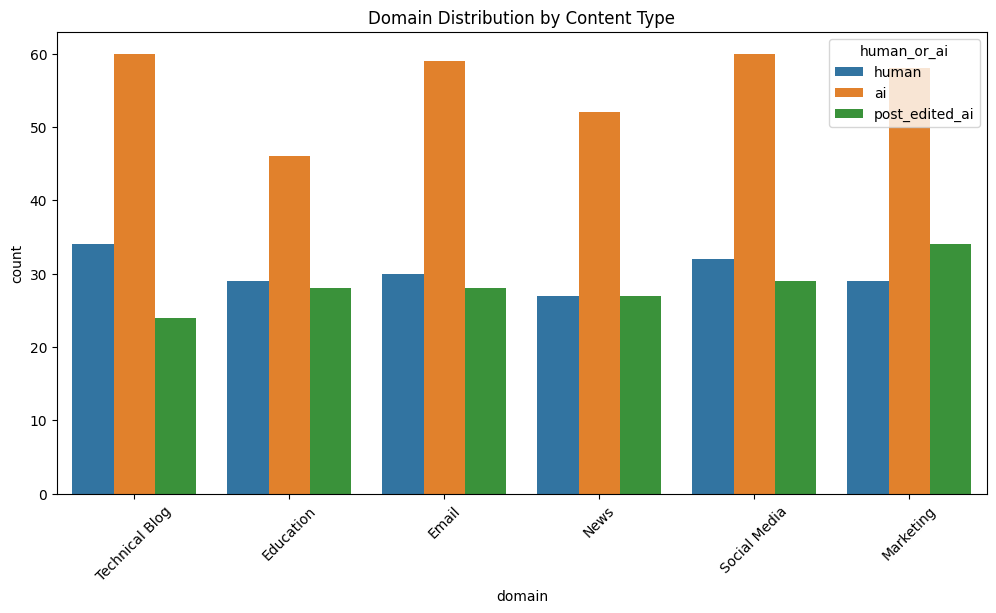

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="domain", hue="human_or_ai")
plt.title("Domain Distribution by Content Type")
plt.xticks(rotation=45)
plt.show()


**Insight:**

AI tends to generate more content in News, Technical Blog, and Marketing.

Humans have smaller contributions across domains.

## Language Distributiojn by content type

In [26]:
df.groupby(["human_or_ai","language"])["id"].count()

human_or_ai     language  
ai              ar             35
                code-mixed     13
                en            141
                es             21
                fr             15
                hi             60
                ur             50
human           ar             25
                code-mixed     21
                en             43
                es             34
                fr             25
                hi             16
                ur             17
post_edited_ai  ar             19
                code-mixed     13
                en             62
                es             15
                fr             12
                hi             23
                ur             26
Name: id, dtype: int64

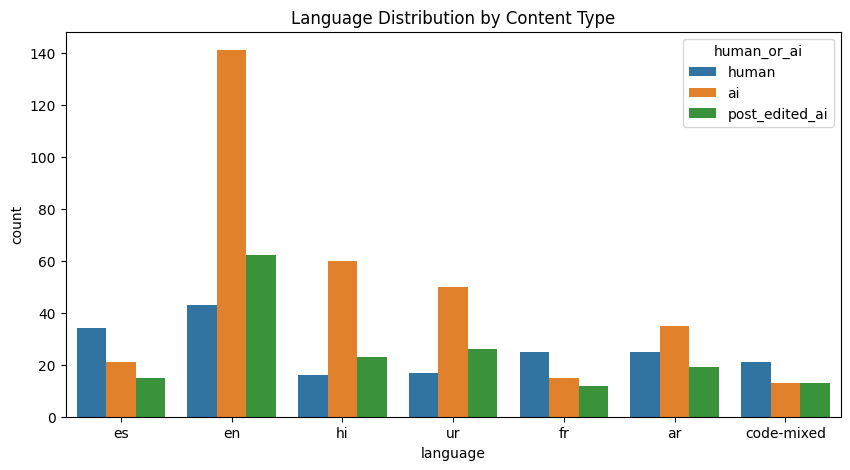

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="language", hue="human_or_ai")
plt.title("Language Distribution by Content Type")
plt.show()


**Insight:**

You can analyze which languages AI prefers vs humans.

##Word Count Analysis

Average word count by human_or_ai

In [28]:
df.groupby("human_or_ai")["word_count"].mean()

,word_count
human_or_ai,
ai,373.916418
human,39.082873
post_edited_ai,280.011765


Average word count by domain

In [33]:
df.groupby(["human_or_ai","domain"])["word_count"].mean()

human_or_ai     domain        
ai              Education         379.043478
                Email             260.779661
                Marketing         414.103448
                News              456.634615
                Social Media      246.400000
                Technical Blog    498.216667
human           Education          58.862069
                Email              36.766667
                Marketing          32.379310
                News               48.555556
                Social Media       24.531250
                Technical Blog     36.147059
post_edited_ai  Education         291.250000
                Email             202.750000
                Marketing         309.941176
                News              298.814815
                Social Media      166.448276
                Technical Blog    430.708333
Name: word_count, dtype: float64

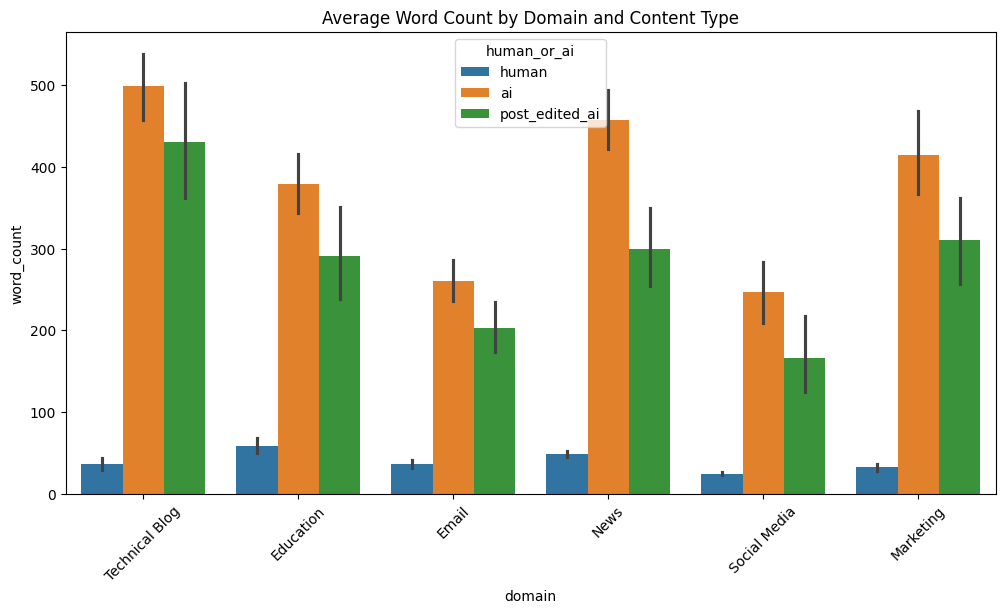

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="domain", y="word_count", hue="human_or_ai")
plt.title("Average Word Count by Domain and Content Type")
plt.xticks(rotation=45)
plt.show()


**Insight:**

AI content tends to be longer than human content.

Post-edited AI can also be long depending on edits.

##Prompt Analysis

Count of prompts used per human_or_ai:

In [37]:
df.groupby("human_or_ai")["prompt"].count()

,prompt
human_or_ai,
ai,335
human,0
post_edited_ai,170


Top 10 prompts for AI:

In [48]:
df[df["human_or_ai"]=="ai"].groupby("prompt")["id"].count().sort_values(ascending=False).head(10)

,id
prompt,
Write product description for innovative tech gadget,11
Write a professional job application email for software engineer position,7
Draft a LinkedIn post about career growth strategies,7
Write about economic trends affecting global markets,7
Create an email campaign for a digital marketing agency,7
Write an email requesting time off from work,7
Write a news article about recent developments in renewable energy,6
Report on social issues in urban communities,6
Write about best practices in cloud computing,6


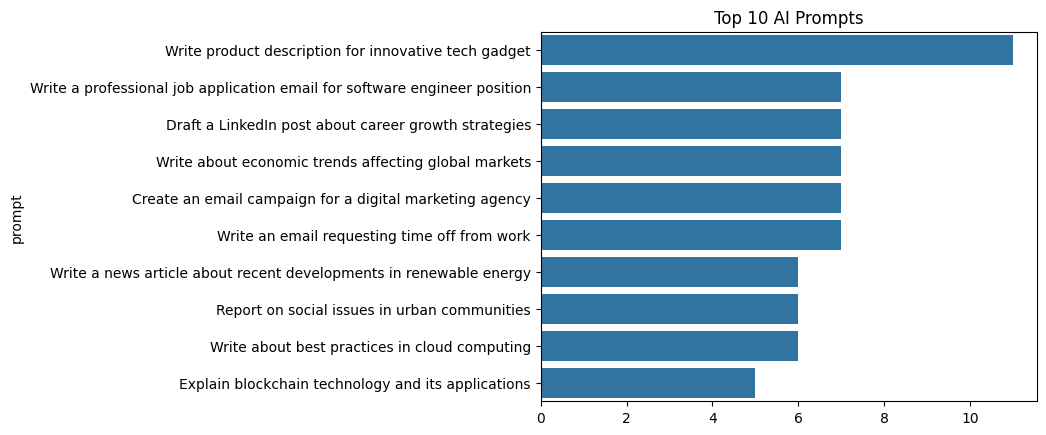

In [49]:
top_prompts = df[df["human_or_ai"]=="ai"].groupby("prompt")["id"].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_prompts.values, y=top_prompts.index)
plt.title("Top 10 AI Prompts")
plt.show()


**Insight:**

Most common prompts indicate the popular use cases of AI generation.

##Source Model Analysis

In [51]:
df.groupby("source_model")["id"].count()

,id
source_model,
Human,181
gemma2-9b-it,3
gemma2-9b-itllama-3.3-70b-versatile,3
llama-3.1-8b-instant,499


In [52]:
df.groupby("source_model")["word_count"].mean()

,word_count
source_model,
Human,39.082873
gemma2-9b-it,10.666667
gemma2-9b-itllama-3.3-70b-versatile,10.666667
llama-3.1-8b-instant,346.292585


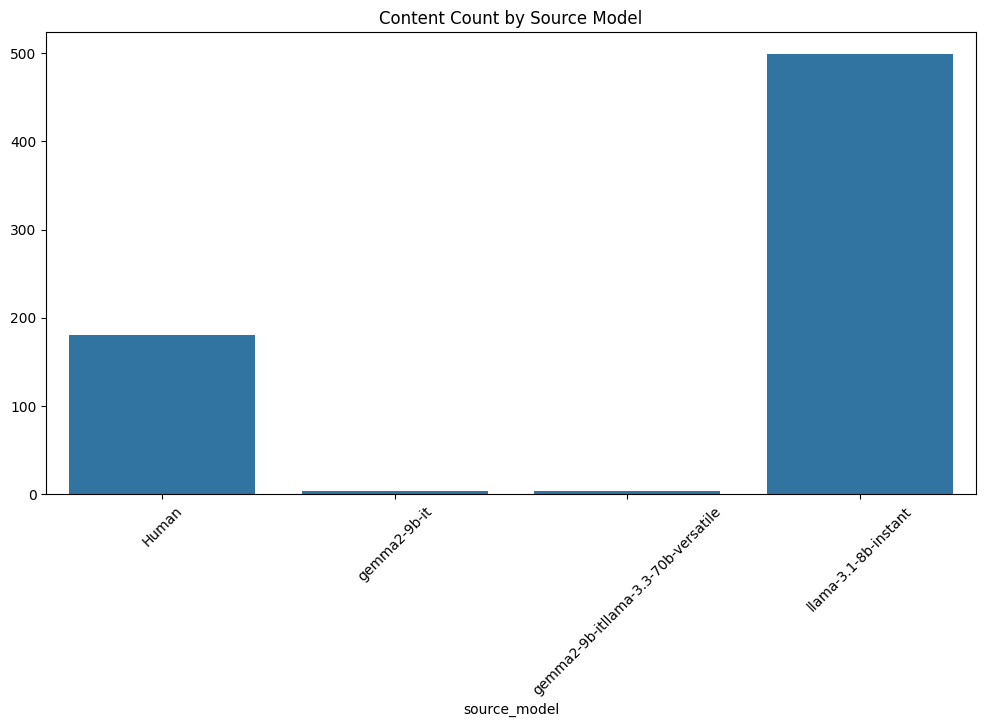

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby("source_model")["id"].count().index,y=df.groupby("source_model")["id"].count().values)
plt.xticks(rotation=45)
plt.title("Content Count by Source Model")
plt.show()


## Summary Insights
- AI content dominates domains like News and Technical Blog.
- Human content is shorter and less frequent.
- AI prompts show common use cases: Marketing, Emails, Education.
- Post-edited AI has word counts closer to AI content.
